In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import apache_log_parser
%matplotlib inline

In [2]:
fformat = '%V %h %l %u %t \"%r\" %>s %b \"%{Referer}i\" \"%{User-Agent}i\" %T'
p = apache_log_parser.make_parser(fformat)

In [3]:
sample_string = 'koldunov.net 85.26.235.202 - - [16/Mar/2013:00:19:43 +0400] "GET /?p=364 HTTP/1.0" 200 65237 "http://koldunov.net/?p=364" "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11" 0'
data = p(sample_string)
data

{'remote_host': '85.26.235.202',
 'remote_logname': '-',
 'remote_user': '-',
 'request_first_line': 'GET /?p=364 HTTP/1.0',
 'request_header_referer': 'http://koldunov.net/?p=364',
 'request_header_user_agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
 'request_header_user_agent__browser__family': 'Chrome',
 'request_header_user_agent__browser__version_string': '23.0.1271',
 'request_header_user_agent__is_mobile': False,
 'request_header_user_agent__os__family': 'Windows',
 'request_header_user_agent__os__version_string': 'XP',
 'request_http_ver': '1.0',
 'request_method': 'GET',
 'request_url': '/?p=364',
 'request_url_fragment': '',
 'request_url_hostname': None,
 'request_url_netloc': '',
 'request_url_password': None,
 'request_url_path': '/',
 'request_url_port': None,
 'request_url_query': 'p=364',
 'request_url_query_dict': {'p': ['364']},
 'request_url_query_list': [('p', '364')],
 'request_url_query_simple_dict'

In [4]:
datas = open(r'H:\python数据分析\数据\apache_access_log').readlines()  #逐行读取数据
log_list = []
for line in datas:
    data = p(line)
    data['time_received'] = data['time_received'][1:12]+' '+data['time_received'][13:21]+' '+data['time_received'][22:27] #时间数据整理
    log_list.append(data)    #传入列表
    
log = pd.DataFrame(log_list)   #构造DataFrame
log = log[['status','response_bytes_clf','remote_host','request_first_line','time_received']]   #提取感兴趣的字段
log.head()

,status,response_bytes_clf,remote_host,request_first_line,time_received
0,200,26126,109.165.31.156,GET /index.php?option=com_content&task=section...,16/Mar/2013 08:00:25 +0400
1,200,10532,109.165.31.156,GET /templates/ja_procyon/css/template_css.css...,16/Mar/2013 08:00:25 +0400
2,200,1853,109.165.31.156,GET /templates/ja_procyon/switcher.js HTTP/1.0,16/Mar/2013 08:00:25 +0400
3,200,37153,109.165.31.156,GET /includes/js/overlib_mini.js HTTP/1.0,16/Mar/2013 08:00:25 +0400
4,200,3978,109.165.31.156,GET /modules/ja_transmenu/transmenuh.css HTTP/1.0,16/Mar/2013 08:00:25 +0400


In [5]:
log.isnull().sum()

status                0
response_bytes_clf    0
remote_host           0
request_first_line    0
time_received         0
dtype: int64

In [6]:
log['time_received'] = pd.to_datetime(log['time_received'])
log = log.set_index('time_received')
log.head()

,status,response_bytes_clf,remote_host,request_first_line
time_received,,,,
2013-03-16 04:00:25,200,26126,109.165.31.156,GET /index.php?option=com_content&task=section...
2013-03-16 04:00:25,200,10532,109.165.31.156,GET /templates/ja_procyon/css/template_css.css...
2013-03-16 04:00:25,200,1853,109.165.31.156,GET /templates/ja_procyon/switcher.js HTTP/1.0
2013-03-16 04:00:25,200,37153,109.165.31.156,GET /includes/js/overlib_mini.js HTTP/1.0
2013-03-16 04:00:25,200,3978,109.165.31.156,GET /modules/ja_transmenu/transmenuh.css HTTP/1.0


In [7]:
log.dtypes

status                object
response_bytes_clf    object
remote_host           object
request_first_line    object
dtype: object

In [8]:
log['status'] = log['status'].astype('int')

In [9]:
log['response_bytes_clf'].unique()

array(['26126', '10532', '1853', ..., '66386', '47413', '48212'], dtype=object)

In [10]:
log[log['response_bytes_clf'] == '-'].head()

,status,response_bytes_clf,remote_host,request_first_line
time_received,,,,
2013-03-16 04:19:41,304,-,178.154.206.250,GET /images/stories/researchers/laplace.jpg HT...
2013-03-16 04:33:14,304,-,178.154.206.250,GET /images/stories/researchers/treshnikov.jpg...
2013-03-16 04:42:43,304,-,178.154.206.250,GET /mypict/moc2.png HTTP/1.0
2013-03-16 04:47:04,302,-,176.8.91.244,POST /podcast/wp-comments-post.php HTTP/1.0
2013-03-16 05:14:31,304,-,178.154.206.250,GET /mypict/liza2_4_converted.jpg HTTP/1.0


In [11]:
def dash2nan(x):
    if x == '-':
        x = np.nan
    else:
        x = float(x)/1048576
    return x

log['response_bytes_clf'] = log['response_bytes_clf'].map(dash2nan)
log.head()

,status,response_bytes_clf,remote_host,request_first_line
time_received,,,,
2013-03-16 04:00:25,200,0.024916,109.165.31.156,GET /index.php?option=com_content&task=section...
2013-03-16 04:00:25,200,0.010044,109.165.31.156,GET /templates/ja_procyon/css/template_css.css...
2013-03-16 04:00:25,200,0.001767,109.165.31.156,GET /templates/ja_procyon/switcher.js HTTP/1.0
2013-03-16 04:00:25,200,0.035432,109.165.31.156,GET /includes/js/overlib_mini.js HTTP/1.0
2013-03-16 04:00:25,200,0.003794,109.165.31.156,GET /modules/ja_transmenu/transmenuh.css HTTP/1.0


In [12]:
log.dtypes

status                  int32
response_bytes_clf    float64
remote_host            object
request_first_line     object
dtype: object

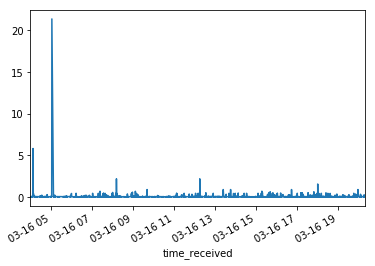

In [13]:
log['response_bytes_clf'].plot()

In [14]:
log[log['response_bytes_clf']>20]

,status,response_bytes_clf,remote_host,request_first_line
time_received,,,,
2013-03-16 05:02:59,200,21.365701,77.50.248.20,GET /books/Bondarenko.pdf HTTP/1.0


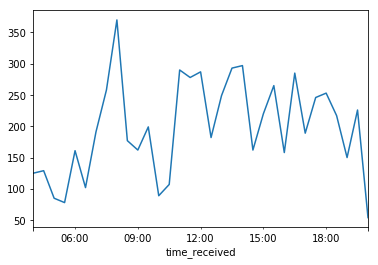

In [15]:
t_log = log['response_bytes_clf'].resample('30t').count()
t_log.plot()

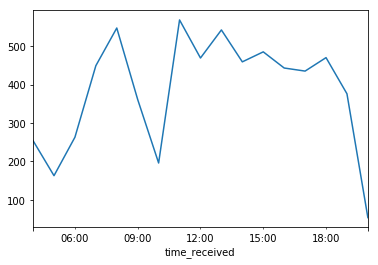

In [16]:
h_log = log['response_bytes_clf'].resample('H').count()
h_log.plot()

In [17]:
d_log = pd.DataFrame({'count':log['response_bytes_clf'].resample('10t').count(),
                      'sum':log['response_bytes_clf'].resample('10t').sum()})
d_log.head()

,count,sum
time_received,,
2013-03-16 04:00:00,59,6.957677
2013-03-16 04:10:00,35,0.929472
2013-03-16 04:20:00,31,0.771323
2013-03-16 04:30:00,35,0.771191
2013-03-16 04:40:00,38,0.943575


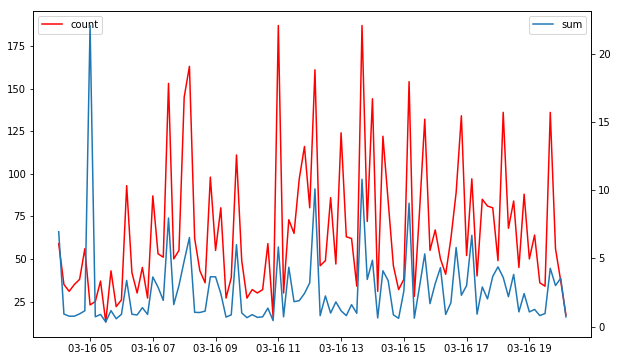

In [18]:
plt.figure(figsize=(10,6))   #设置图表大小
ax1 = plt.subplot(111)    #一个subplot
ax2 = ax1.twinx()     #公用x轴
ax1.plot(d_log['count'],color='r',label='count')
ax1.legend(loc=2)
ax2.plot(d_log['sum'],label='sum')
ax2.legend(loc=0)

In [19]:
d_log.corr()

,count,sum
count,1.000000,0.512629
sum,0.512629,1.000000


# 状态码分析

In [20]:
log.head()

,status,response_bytes_clf,remote_host,request_first_line
time_received,,,,
2013-03-16 04:00:25,200,0.024916,109.165.31.156,GET /index.php?option=com_content&task=section...
2013-03-16 04:00:25,200,0.010044,109.165.31.156,GET /templates/ja_procyon/css/template_css.css...
2013-03-16 04:00:25,200,0.001767,109.165.31.156,GET /templates/ja_procyon/switcher.js HTTP/1.0
2013-03-16 04:00:25,200,0.035432,109.165.31.156,GET /includes/js/overlib_mini.js HTTP/1.0
2013-03-16 04:00:25,200,0.003794,109.165.31.156,GET /modules/ja_transmenu/transmenuh.css HTTP/1.0


In [21]:
log['status'].unique()

array([200, 403, 404, 301, 400, 304, 302, 206], dtype=int64)

In [22]:
status_log = log.groupby('status')['remote_host'].count()
status_log

status
200    5606
206      11
301     629
302       6
304      75
400       1
403     247
404      59
Name: remote_host, dtype: int64

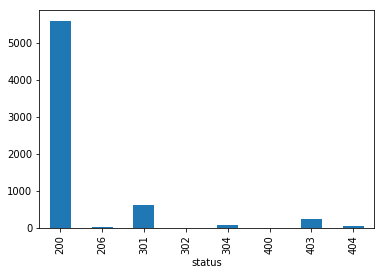

In [23]:
status_log.plot(kind='bar')

In [24]:
log_404 = log['status'][log['status'] == 404].resample('2H').count()  
log_403 = log['status'][log['status'] == 403].resample('2H').count()
log_200 = log['status'][log['status'] == 200].resample('2H').count() #统计状态码个数

new_log = pd.DataFrame({'Not Found':log_404, 'Forbidden':log_403, 'Success':log_200})  #构造DataFrame
new_log

,Forbidden,Not Found,Success
time_received,,,
2013-03-16 04:00:00,22,3,375
2013-03-16 06:00:00,26,2,607
2013-03-16 08:00:00,45,2,780
2013-03-16 10:00:00,29,4,699
2013-03-16 12:00:00,27,5,886
2013-03-16 14:00:00,42,21,785
2013-03-16 16:00:00,16,14,757
2013-03-16 18:00:00,38,6,669
2013-03-16 20:00:00,2,2,48


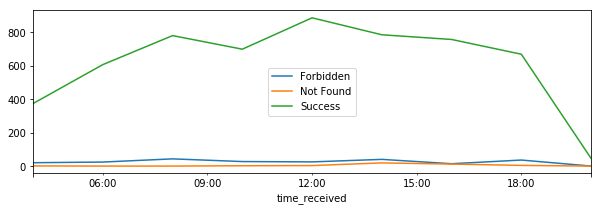

In [25]:
new_log.plot(figsize=(10, 3))

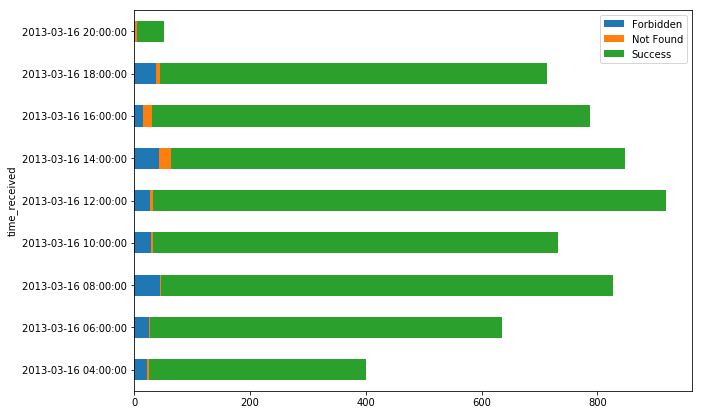

In [26]:
new_log.plot(kind='barh', stacked=True, figsize=(10, 7))

# ip地址

In [27]:
ip_count = log['remote_host'].value_counts()[0:10]
ip_count

66.249.73.137      814
178.154.206.250    168
85.114.191.235     165
173.199.115.187    127
85.142.104.227     126
178.70.210.234     120
85.142.104.228     111
95.118.89.119       93
217.69.133.68       74
212.3.137.202       72
Name: remote_host, dtype: int64

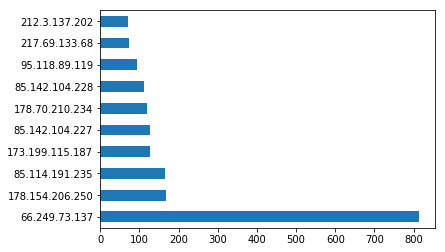

In [28]:
ip_count.plot(kind='barh')

In [29]:
import pygeoip
gi = pygeoip.GeoIP(r'H:\python数据分析\数据\GeoLiteCity.dat', pygeoip.MEMORY_CACHE)
info = gi.record_by_addr('64.233.161.99')
info

{'area_code': 650,
 'city': 'Mountain View',
 'continent': 'NA',
 'country_code': 'US',
 'country_code3': 'USA',
 'country_name': 'United States',
 'dma_code': 807,
 'latitude': 37.41919999999999,
 'longitude': -122.0574,
 'metro_code': 'San Francisco, CA',
 'postal_code': '94043',
 'region_code': 'CA',
 'time_zone': 'America/Los_Angeles'}

In [30]:
ips = log.groupby('remote_host')['status'].agg(['count'])
ips.head()

,count
remote_host,
100.44.124.8,26
108.171.252.242,24
109.165.31.156,12
109.171.109.164,4
109.191.82.110,14


In [31]:
ips.drop('91.224.246.183',inplace=True)

In [32]:
ips['country'] = [gi.record_by_addr(i)['country_code3'] for i in ips.index]
ips['latitude'] = [gi.record_by_addr(i)['latitude'] for i in ips.index]
ips['longitude'] = [gi.record_by_addr(i)['longitude'] for i in ips.index]

ips.head()

,count,country,latitude,longitude
remote_host,,,,
100.44.124.8,26,USA,37.7510,-97.8220
108.171.252.242,24,USA,34.0115,-117.8535
109.165.31.156,12,RUS,47.2364,39.7139
109.171.109.164,4,RUS,55.0415,82.9346
109.191.82.110,14,RUS,55.1544,61.4297


In [33]:
country = ips.groupby('country')['count'].sum()
country = country.sort_values(ascending=False)[0:10]
country

country
RUS    3602
USA    1620
UKR     603
CHN     154
DEU     138
EU      106
BLR      71
FRA      56
EST      39
TUR      31
Name: count, dtype: int64

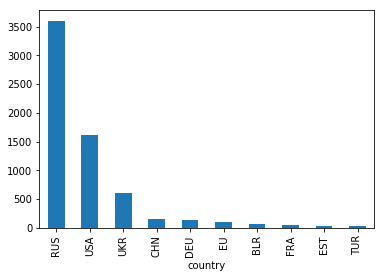

In [34]:
country.plot(kind='bar')

In [35]:
# ips['std_count'] = (ips['count'] - ips['count'].min())/(ips['count'].max() - ips['count'].min())
# ips.head()

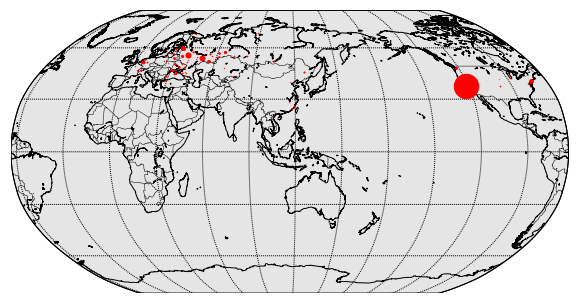

In [36]:
from mpl_toolkits.basemap import Basemap

plt.style.use('ggplot')
plt.figure(figsize=(10,6))

map1 = Basemap(projection='robin', lat_0=39.9, lon_0=116.3,
               resolution = 'l', area_thresh = 1000.0) 

map1.drawcoastlines()
map1.drawcountries()
map1.drawmapboundary()

map1.drawmeridians(np.arange(0, 360, 30))
map1.drawparallels(np.arange(-90, 90, 30))

size = 0.03
for lon, lat, mag in zip(list(ips['longitude']), list(ips['latitude']), list(ips['count'])):
    x,y = map1(lon, lat)
    msize = mag * size
    map1.plot(x, y, 'ro', markersize=msize)